In [1]:
#Import
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [3]:
# Expected models and corresponding metrics files
model_files = {
    "Logistic": "../reports/logistic_regression_metrics.json",
    "KNN": "../reports/knn_metrics.json",
    "Random Forest": "../reports/random_forest_model_metrics.json",
    "SVM": "../reports/svm_model_metrics.json"
}

metrics_list = []

for model_name, file_path in model_files.items():
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            data = json.load(f)
            metrics_list.append({
                "Model": model_name,
                "Accuracy": data.get("Accuracy"),
                "F1 Macro": data.get("F1 Macro"),
                "ROC AUC": data.get("ROC AUC (macro)"),
                "Prediction Time (s)": data.get("Prediction Time (s)"),
                "Model Size (KB)": data.get("Model Size (KB)")
            })
    else:
        print(f"Metrics for '{model_name}' not found. Please run the {model_name} evaluation script first.")

if metrics_list:
    df = pd.DataFrame(metrics_list).set_index("Model")
    display(df)
else:
    print("No metrics files found. Please run the model evaluations first.")

,Accuracy,F1 Macro,ROC AUC,Prediction Time (s),Model Size (KB)
Model,,,,,
Logistic,0.9202,0.9191,0.9919,0.0348,62.23
KNN,0.9705,0.9704,0.9930,16.5110,367969.57
Random Forest,0.9705,0.9703,0.9991,0.1236,140465.32
SVM,0.9790,0.9789,0.9997,83.4929,75676.76


C:\Users\syamg\AppData\Local\Temp\ipykernel_5804\1008998958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="Blues_d")


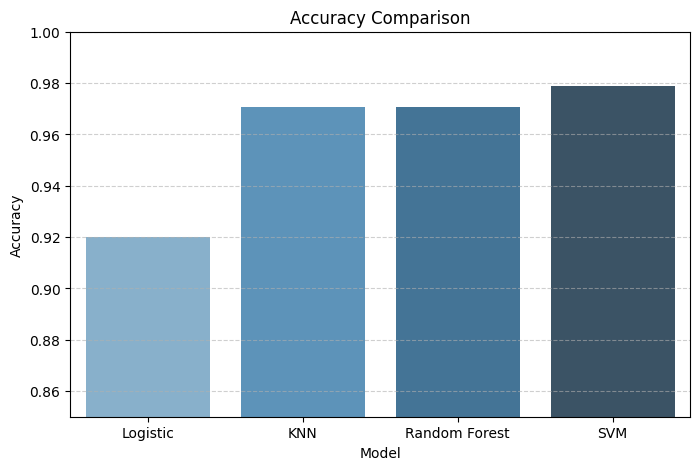

C:\Users\syamg\AppData\Local\Temp\ipykernel_5804\1008998958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="Blues_d")


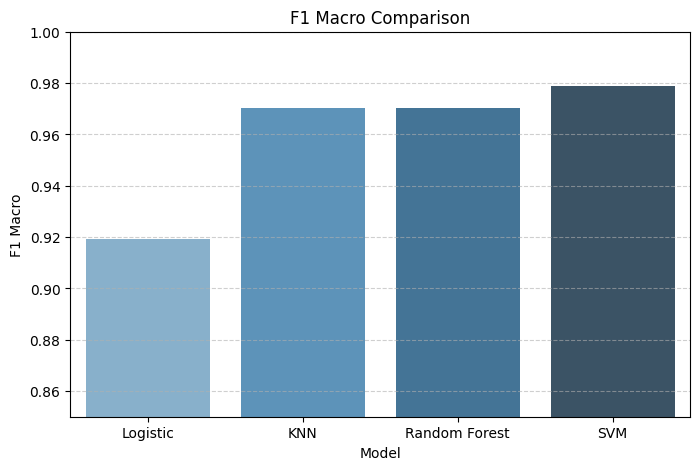

C:\Users\syamg\AppData\Local\Temp\ipykernel_5804\1008998958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df[metric], palette="Blues_d")


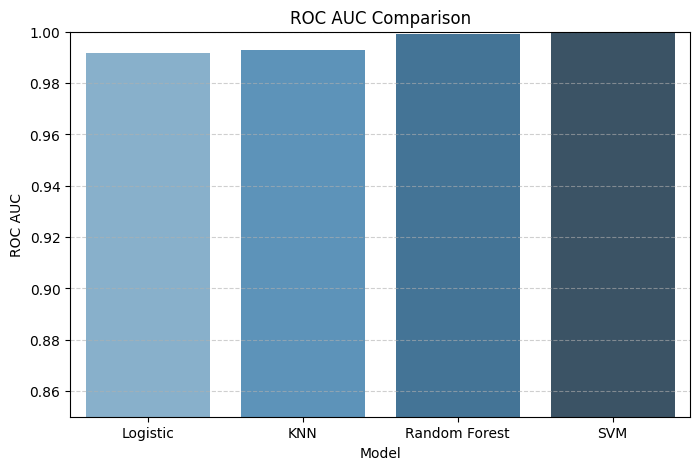

In [4]:
#Comparing accuracy, F1 Marco and ROC AUC
metrics_to_plot = ["Accuracy", "F1 Macro", "ROC AUC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df.index, y=df[metric], palette="Blues_d")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0.85, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

C:\Users\syamg\AppData\Local\Temp\ipykernel_5804\2120013150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["Prediction Time (s)"], palette="viridis")


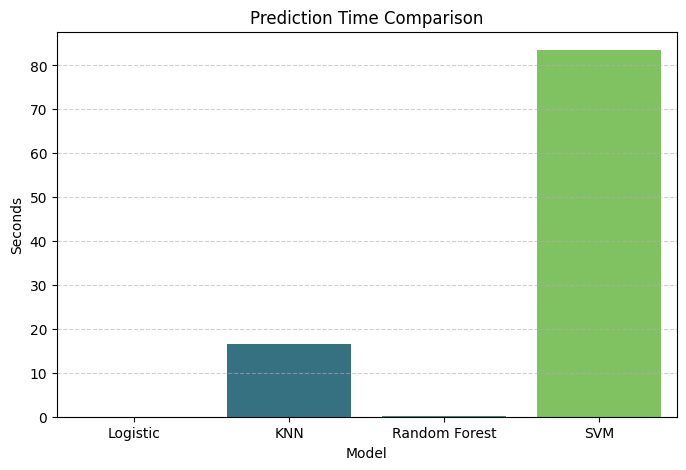

C:\Users\syamg\AppData\Local\Temp\ipykernel_5804\2120013150.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["Model Size (KB)"], palette="magma")


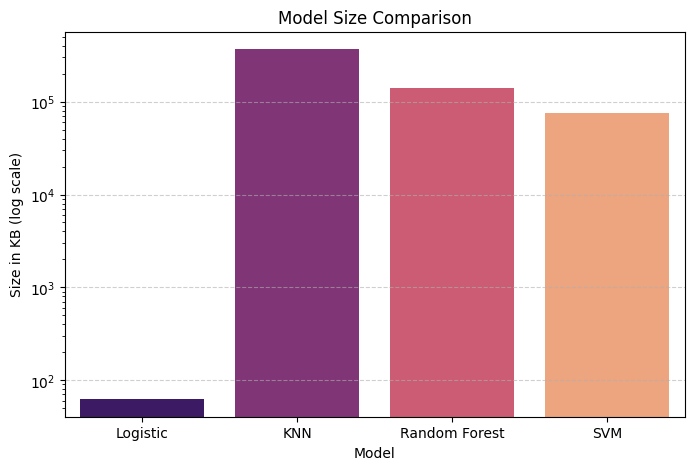

In [5]:
# Prediction Time
plt.figure(figsize=(8, 5))
sns.barplot(x=df.index, y=df["Prediction Time (s)"], palette="viridis")
plt.title("Prediction Time Comparison")
plt.ylabel("Seconds")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Model Size
plt.figure(figsize=(8, 5))
sns.barplot(x=df.index, y=df["Model Size (KB)"], palette="magma")
plt.title("Model Size Comparison")
plt.ylabel("Size in KB (log scale)")
plt.yscale("log")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


ROC Curve for Logistic


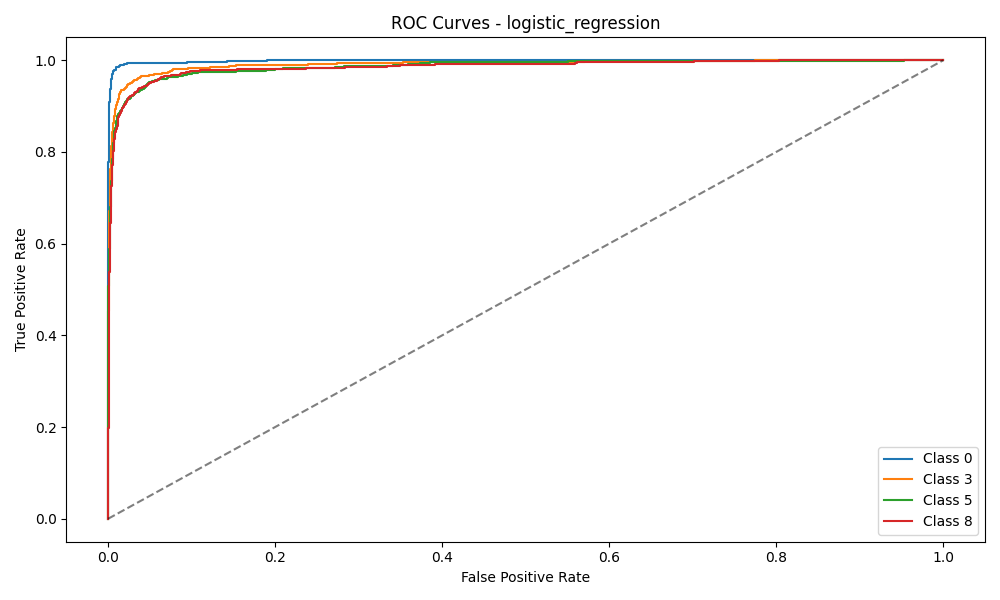

ROC Curve for KNN


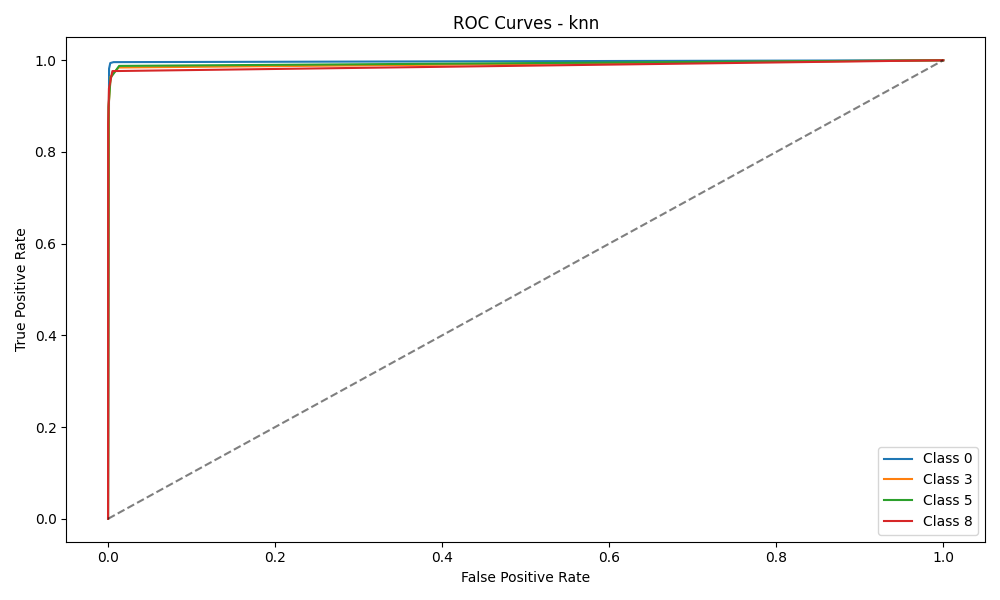

ROC Curve for Random Forest


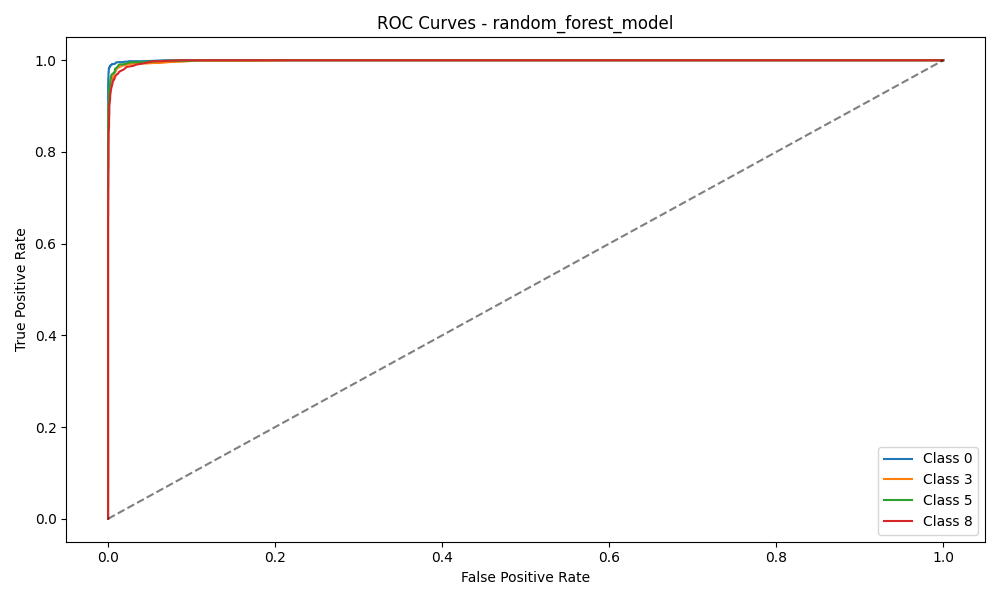

ROC Curve for SVM


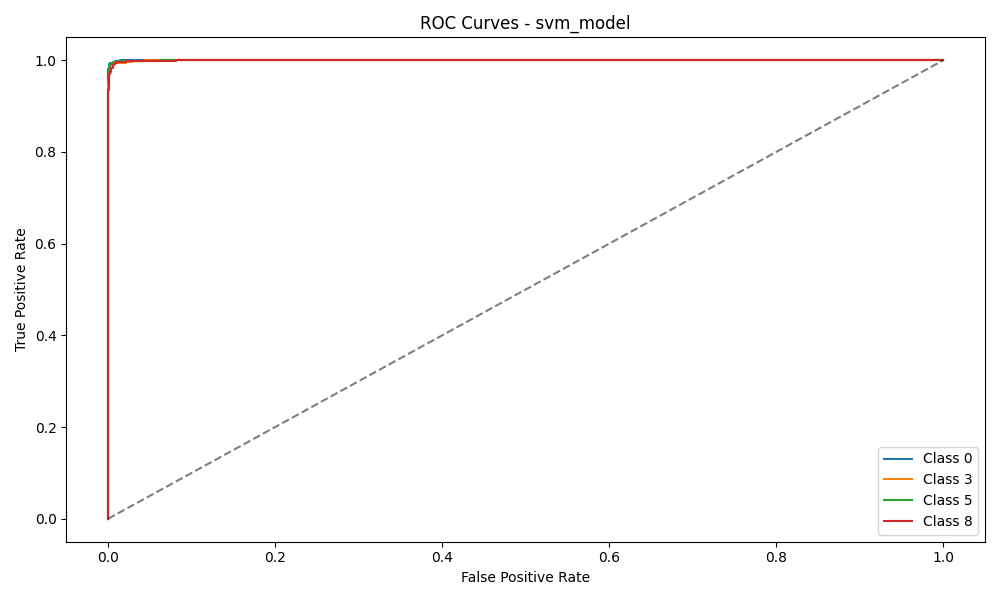

In [6]:
#ROC Curve Images
roc_images = {
    "Logistic": "../reports/logistic_regression_roc_curve.png",
    "KNN": "../reports/knn_roc_curve.png",
    "Random Forest": "../reports/random_forest_model_roc_curve.png",
    "SVM": "../reports/svm_model_roc_curve.png"
}

for model, path in roc_images.items():
    if os.path.exists(path):
        print(f"ROC Curve for {model}")
        display(Image(filename=path))
    else:
        print(f"ROC curve for {model} not found.")
